<a href="https://colab.research.google.com/github/realgermosen/Chatbot_adventist/blob/main/Chatbot_adventist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
path = '/content/drive/MyDrive/Chatbot/dialogs.json'
with open(path, 'r') as content:
    data1 = json.load(content)
print(data1)

{'intents': [{'tag': 'greeting', 'patterns': ['Hi', 'How are you', 'Is anyone there?', 'Hello', 'Good day', 'Whats up'], 'responses': ['Hello!', 'Hey :-)', 'Hi there, what can I do for you?', 'Hi there, how can I help?']}, {'tag': 'goodbye', 'patterns': ['cya', 'See you later', 'Goodbye'], 'responses': ['See you later, thanks for visiting', 'Sad to see you go :(', 'Have a good day', 'Goodbye!', 'Bye! Come back again soon.']}, {'tag': 'thanks', 'patterns': ['Thanks', 'Thank you', 'Thats helpful', "Thank's a lot!"], 'responses': ['Happy to help!', 'Any time1', 'My Pleasure']}, {'tag': 'name', 'patterns': ['what is your name', 'what should I call you', 'whats your name?'], 'responses': ['You can call me Tarun.', "I'm Tarun!", "I'm Tarun aka Tarun Data Scientist."]}, {'tag': 'payements', 'patterns': ['Do you take credit cards', 'Do you accept Mastercards?', 'Can I Pay with Paypal?', 'Are you cash only?', 'COD'], 'responses': ['We accept VISA, Mastercard and Paypal', 'We accept most major C

In [131]:
"""
content = {"intents":
  [
    {
      "tag":"greeting",
      "input":["hello", "hi there", "nice to meet you", "hi, there?", "hey"],
      "responses":[
        "hi!",
        "Welcome aboard, how may I help you?",
        "Ahoy!!",
        "Hi! how are you?",
        "Hi, nice to meet you!"
        ]
    },
    {
      "tag":"goodbye",
      "input":["Thank you", "Thanks", "Thanks for the information", "Bye", "see you later"],
      "responses":[
        "Okay, Bye",
        "Have a nice day",
        "Adios",
        "Good bye",
        "Until next time"
        ]
    }
  ]
 }
 """

'\ncontent = {"intents":\n  [\n    {\n      "tag":"greeting",\n      "input":["hello", "hi there", "nice to meet you", "hi, there?", "hey"],\n      "responses":[\n        "hi!",\n        "Welcome aboard, how may I help you?",\n        "Ahoy!!",\n        "Hi! how are you?",\n        "Hi, nice to meet you!"\n        ]\n    },\n    {\n      "tag":"goodbye",\n      "input":["Thank you", "Thanks", "Thanks for the information", "Bye", "see you later"],\n      "responses":[\n        "Okay, Bye",\n        "Have a nice day",\n        "Adios",\n        "Good bye",\n        "Until next time"\n        ]\n    }\n  ]\n }\n '

In [132]:
#importing the dataset
# with open('content.json') as content:
  # data1 = json.load(content)
#data1 = content

In [133]:
#getting all the data to lists
tags = []
inputs = []
responses = {}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [134]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [135]:
#printing the data
data

,inputs,tags
0,Hi,greeting
1,How are you,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Good day,greeting
5,Whats up,greeting
6,cya,goodbye
7,See you later,goodbye
8,Goodbye,goodbye
9,Thanks,thanks


In [136]:
data = data.sample(frac=1)

# **Pre-Processing**
Important pre-processing such as removing the punctuations, converting to lowercase, enconding the textual data to numerical data are done

In [137]:
#removing puntuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
34,do you know a joke,funny
17,do you accept mastercards,payements
11,thats helpful,thanks
31,when do i get my delivery,delivery
25,what do you sell,shop
20,cod,payements
28,hours of operation,hours
8,goodbye,goodbye
24,what do you reccommend,shop
4,good day,greeting


In [138]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

Tensorflow's tokenizer assigns a unique token to each distict word and padding is done to get all the data to the same length so as to send it to an RNN layer

In [139]:
input_shape = x_train.shape[1]
print(input_shape)

8


In [140]:
#define vocabu;lary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  81
output length:  12


In [141]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model = Model(i,x)

In [142]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [143]:
#training the model
train = model.fit(x_train, y_train, epochs =200)

Epoch 1/200
2/2 [==============================] - 2s 13ms/step - loss: 2.4840 - accuracy: 0.0444
Epoch 2/200
2/2 [==============================] - 0s 10ms/step - loss: 2.4817 - accuracy: 0.1333
Epoch 3/200
2/2 [==============================] - 0s 12ms/step - loss: 2.4799 - accuracy: 0.2000
Epoch 4/200
2/2 [==============================] - 0s 16ms/step - loss: 2.4782 - accuracy: 0.2222
Epoch 5/200
2/2 [==============================] - 0s 11ms/step - loss: 2.4764 - accuracy: 0.2444
Epoch 6/200
2/2 [==============================] - 0s 11ms/step - loss: 2.4748 - accuracy: 0.2222
Epoch 7/200
2/2 [==============================] - 0s 11ms/step - loss: 2.4731 - accuracy: 0.2000
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 2.4712 - accuracy: 0.2000
Epoch 9/200
2/2 [==============================] - 0s 9ms/step - loss: 2.4696 - accuracy: 0.1778
Epoch 10/200
2/2 [==============================] - 0s 12ms/step - loss: 2.4678 - accuracy: 0.1556
Epoch 11/200
2/2 [===

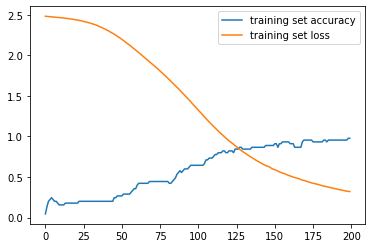

In [144]:
#Plotting model accuracy
plt.plot(train.history['accuracy'], label='training set accuracy')
plt.plot(train.history['loss'], label='training set loss')
plt.legend()

# Testing

In [ ]:
import random

while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input], input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Ellen : ", random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

You : Hi
Ellen :  Hey :-)
You : How are you?
Ellen :  Hello!
You : Can you help me?
Ellen :  Hi there, what can I do for you?
